In [2]:
!pip install qiskit
!pip install pylatexenc

In [4]:
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 34.9 MB/s eta 0:00:00


**Installing dependencies**

In [5]:
# Importing everything
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
# importing Qiskit
from qiskit import transpile, assemble
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
# import basic plot tools and circuits
from qiskit.quantum_info import DensityMatrix, Statevector
from qiskit.visualization import plot_state_city, plot_state_qsphere, plot_bloch_multivector, plot_state_hinton, plot_state_paulivec
from qiskit.visualization import plot_state_qsphere, circuit_drawer

**SuperdenseCoding**

In [6]:
class SuperdenseCoding:
    def __init__(self, message):
        if len(message) != 2 or not set(message).issubset({"0", "1"}):
            raise ValueError(f"message '{message}' is invalid")
        self.message = message
        self.qc = self.prepare_circuit()
        self.qc1 = self.prepare_circuit1()
        self.simulator = AerSimulator()
        self.result = None

    def create_bell_pair(self):
        """Creates a Bell pair."""
        qc = QuantumCircuit(2)
        qc.h(1)
        qc.cx(1, 0)
        return qc

    def encode_message(self, qc, qubit, msg):
        """Encodes a two-bit message on qc using the superdense coding protocol"""
        if len(msg) != 2 or not set(msg).issubset({"0", "1"}):
            raise ValueError(f"message '{msg}' is invalid")
        if msg[1] == "1":
            qc.x(qubit)
        if msg[0] == "1":
            qc.z(qubit)
        return qc

    def decode_message(self, qc):
        """Decodes the message by applying the recovery protocol."""
        qc.cx(1, 0)
        qc.h(1)
        return qc

    def prepare_circuit(self):
        """Prepares the superdense coding circuit with measurements."""
        qc = self.create_bell_pair()
        qc.barrier()  # Use barrier to separate steps
        qc = self.encode_message(qc, 1, self.message)  # Alice encodes the message
        qc.barrier()  # Use barrier to separate steps
        qc = self.decode_message(qc)  # Bob decodes the message
        qc.measure_all()  # Measure all qubits
        return qc

    def prepare_circuit1(self):
        """Prepares the superdense coding circuit without measurements."""
        qc1 = self.create_bell_pair()
        qc1.barrier()  # Use barrier to separate steps
        qc1 = self.encode_message(qc1, 1, self.message)  # Alice encodes the message
        qc1.barrier()  # Use barrier to separate steps
        qc1 = self.decode_message(qc1)  # Bob decodes the message
        return qc1

    def run_simulation(self, shots=1024):
        transpiled_qc = transpile(self.qc, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def run_simulation1(self, shots=1024):
        transpiled_qc = transpile(self.qc1, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()


    def get_counts(self):
        if self.result:
            counts = self.result.get_counts(self.qc)
            return counts
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def plot_result(self):
        if self.result:
            counts = self.result.get_counts(self.qc)
            return plot_histogram(counts)
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def psi(self):
        psi = Statevector(self.qc1)  # Ensure correct method for statevector creation
        return psi

    def get_density(self):
        psi = Statevector(self.qc1)
        return DensityMatrix(psi).draw("latex").data

    def get_city(self):
        psi = Statevector(self.qc1)
        return plot_state_city(psi)

    def get_circuit(self):
        return circuit_drawer(self.qc, output='mpl', filename='circuit.png')

    def get_hinton(self):
        psi = Statevector(self.qc1)
        return plot_state_hinton(psi)

    def get_paulivec(self):
        psi = Statevector(self.qc1)
        return plot_state_paulivec(psi)

    def get_qsphere(self):
        psi = Statevector(self.qc1)
        return plot_state_qsphere(psi)

    def get_bloch(self):
        psi = Statevector(self.qc1)
        return plot_bloch_multivector(psi)

**Running simulation with measurement**

In [7]:
simulator = SuperdenseCoding('10')
simulator.run_simulation()

**Counts**

In [8]:
simulator.get_counts()

{'10': 1024}

**Running simuation wihout measurements**

In [9]:
simulator.run_simulation1()

**Density matrix**

In [10]:
from IPython.display import display, Latex
dmatrix=simulator.get_density()
display(Latex(dmatrix))

<IPython.core.display.Latex object>

**Qsphere representation**

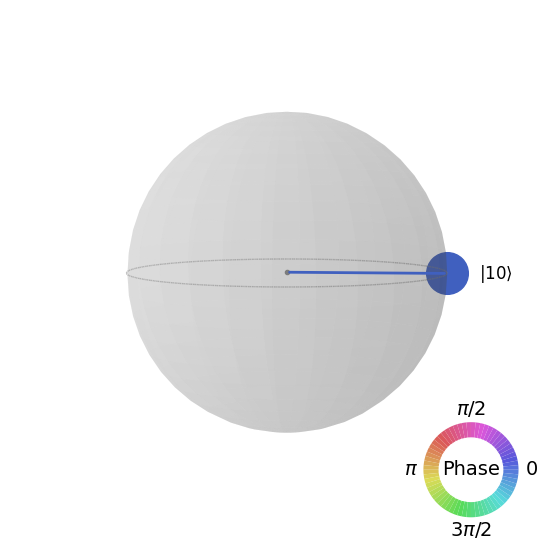

In [11]:
simulator.get_qsphere()

**City Representation**

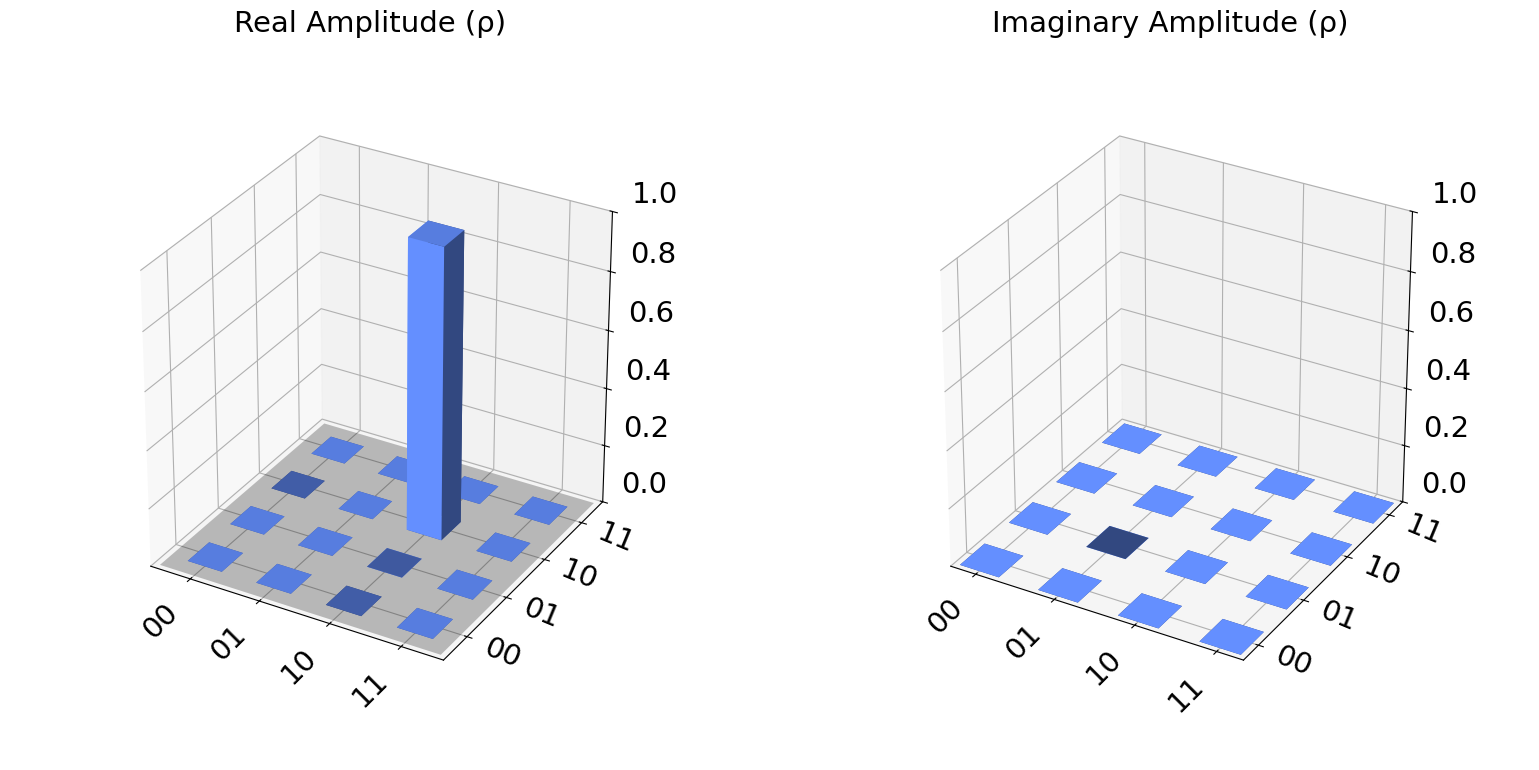

In [12]:
simulator.get_city()

**Circuit Representation**

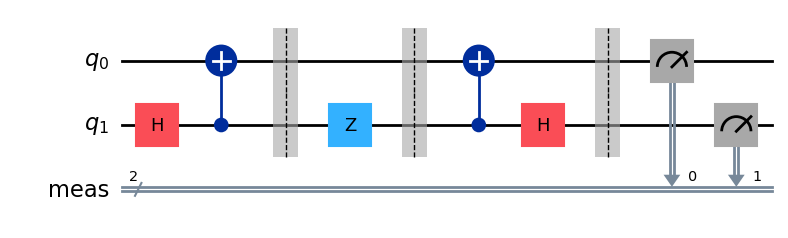

In [13]:
simulator.get_circuit()

**Hinton Representation**

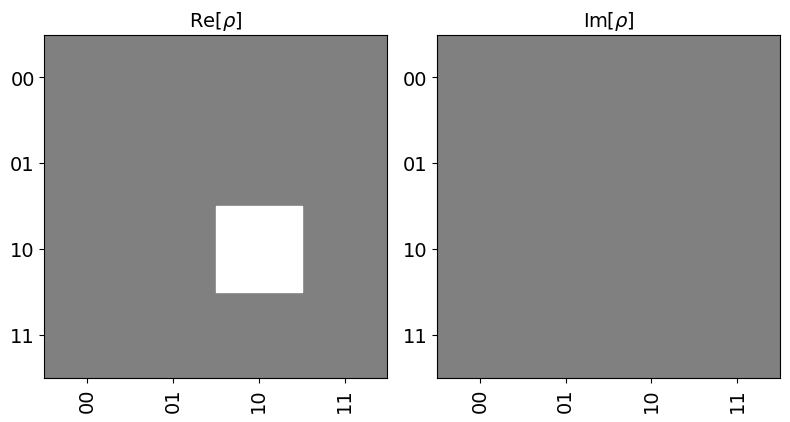

In [14]:
simulator.get_hinton()

**Paulivector Representation**

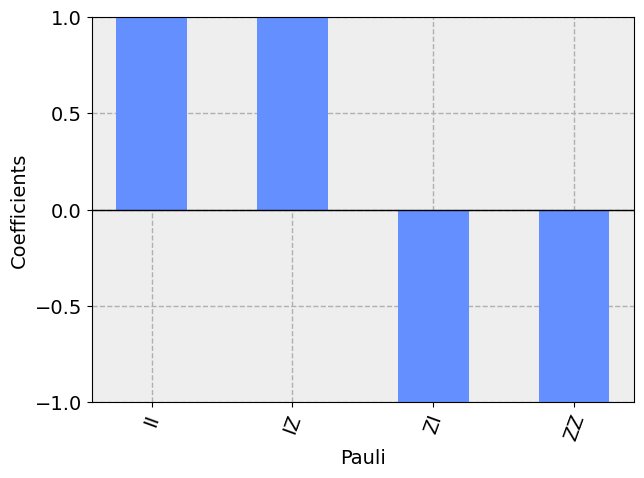

In [15]:
simulator.get_paulivec()

**Bloch sphere Representation**

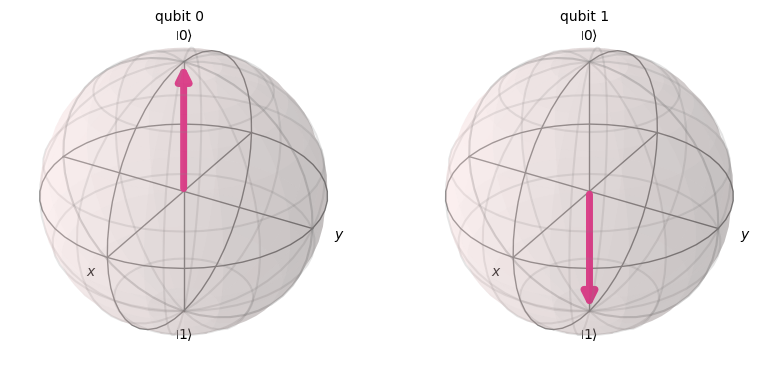

In [16]:
simulator.get_bloch()